<a href="https://colab.research.google.com/github/piyu18/Learn_TensorFlow/blob/main/TensorFlow_Day03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Steps to Create a TensorFlow Model
There are 3 fundamental steps to create a model
  * **Create a Model ->** Connect the layers of NN yourself by using Sequential or Functional API or import a previously built model(Transfer Learning)
  * **Compile a Model ->** Define how a model's performance should be measured(metrics) and how to improve it by using optimizer(Adam, SGD, etc.)
  * **Fit a Model ->** Model try to find pattern in the data

  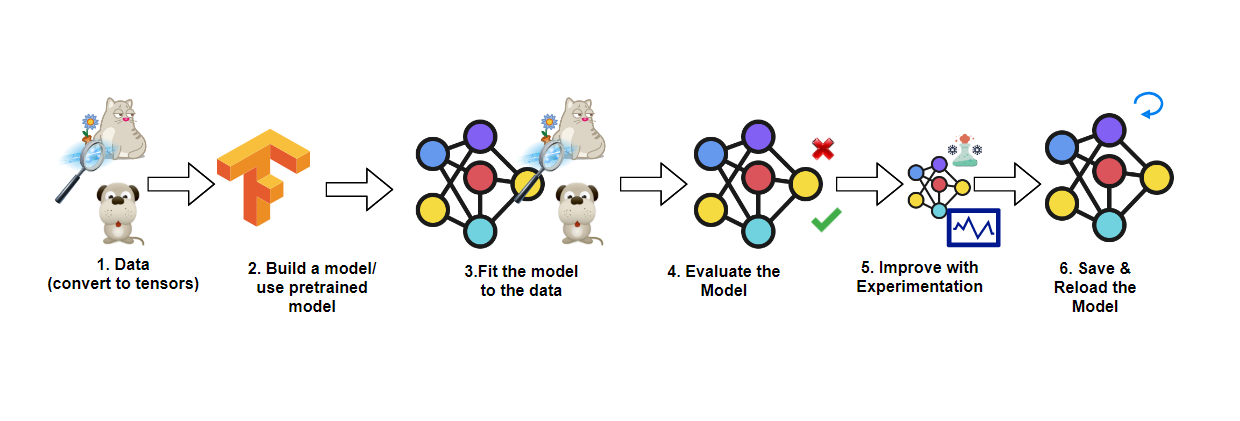

### Sequential and Functional API

**Sequential Model** : A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
A Sequential model is not appropriate when:

* Your model has multiple inputs or multiple outputs
* Any of your layers has multiple inputs or multiple outputs
* You need to do layer sharing
* You want non-linear topology (e.g. a residual connection, a multi-branch model)

**Functional API** : The Keras functional API is a way to create models that are more flexible than the tf.keras.Sequential API. The functional API can handle models with non-linear topology, shared layers, and even multiple inputs or outputs.

The main idea is that a deep learning model is usually a directed acyclic graph (DAG) of layers. So the functional API is a way to build graphs of layers.

### Regression with TensorFlow
In a [regression](https://medium.com/@priya1803/linear-regression-simplest-algorithm-3f91940d1403) problem, the aim is to predict the output of a continuous value, like a price or a probability.






In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Create features using tensors
X = tf.constant(np.random.randint(low =0, high=100, size=50))
X

<tf.Tensor: shape=(50,), dtype=int64, numpy=
array([18, 47, 12, 14,  6,  6, 26, 11, 74, 54, 11, 16, 79, 91, 35, 79, 28,
       97, 16, 38, 87, 78,  4, 60, 44, 51, 21, 48, 69, 17, 35, 49, 29, 96,
        9,  1, 72, 61, 95, 94,  7, 89, 72, 60, 26, 17, 58, 36, 82, 99])>

In [3]:
# Create labels using tensors
y = X*2
y

<tf.Tensor: shape=(50,), dtype=int64, numpy=
array([ 36,  94,  24,  28,  12,  12,  52,  22, 148, 108,  22,  32, 158,
       182,  70, 158,  56, 194,  32,  76, 174, 156,   8, 120,  88, 102,
        42,  96, 138,  34,  70,  98,  58, 192,  18,   2, 144, 122, 190,
       188,  14, 178, 144, 120,  52,  34, 116,  72, 164, 198])>

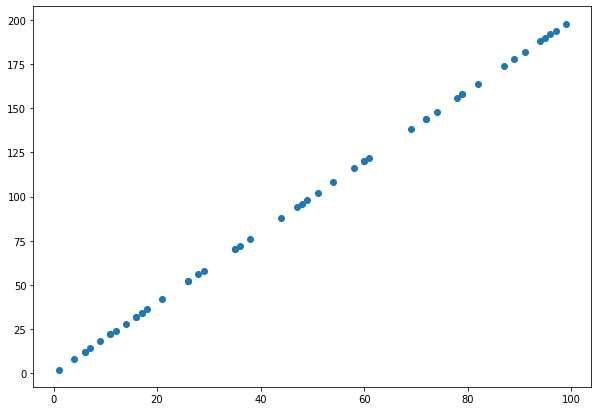

In [4]:
# Visualize it
plt.figure(figsize=(10,7))
plt.scatter(X,y)

In [5]:
X[0].shape, y[0].shape

(TensorShape([]), TensorShape([]))

### Split data into training/test set
One of the other most common and important steps in a machine learning project is creating a training and test set (and when required, a validation set).

**Training set** - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
**Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
**Test set** - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).
For now, we'll just use a training and test set
We can create them by splitting our X and y arrays.

In [6]:
# No of samples
len(X)

50

In [7]:
# Train Test Split(We can use train test split of scikit learn also)
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

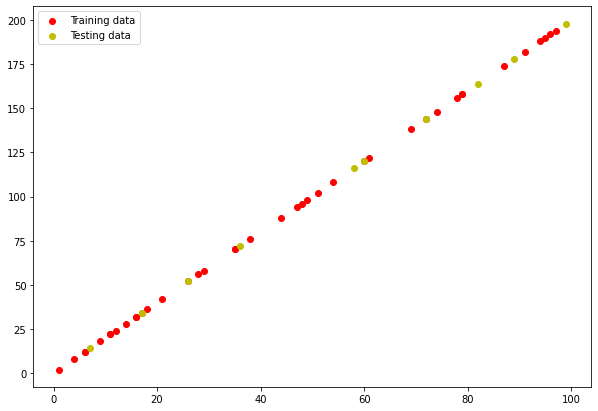

In [8]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='r', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='y', label='Testing data')
# Show the legend
plt.legend();

In [9]:
# Set random seed
tf.random.set_seed(13)

# 1. Create a model using Sequential API 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]) # define the input_shape to our model
])

# 2. Compile the model
model.compile(loss="mae", #Computes the mean absolute error between labels and predictions
              optimizer="SGD",
              metrics=["mae"])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Calling `summary()` on our model shows us the layers it contains, the output shape and the number of parameters.

* `Total params` - total number of parameters in the model.
* `Trainable parameters` - these are the parameters (patterns) the model can update as it trains.
* `Non-trainable parameters` - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

In [11]:
# Fit the model to the training data
model.fit(X_train, y_train, epochs=50) # verbose controls how much gets output
# if we add “verbose = 0” we will not see the training output

Epoch 1/50
2/2 [==============================] - 3s 10ms/step - loss: 68.7835 - mae: 68.7835
Epoch 2/50
2/2 [==============================] - 0s 8ms/step - loss: 25.6554 - mae: 25.6554
Epoch 3/50
2/2 [==============================] - 0s 8ms/step - loss: 7.3881 - mae: 7.3881
Epoch 4/50
2/2 [==============================] - 0s 7ms/step - loss: 8.4377 - mae: 8.4377
Epoch 5/50
2/2 [==============================] - 0s 8ms/step - loss: 7.3554 - mae: 7.3554
Epoch 6/50
2/2 [==============================] - 0s 8ms/step - loss: 5.6257 - mae: 5.6257
Epoch 7/50
2/2 [==============================] - 0s 12ms/step - loss: 9.6886 - mae: 9.6886
Epoch 8/50
2/2 [==============================] - 0s 12ms/step - loss: 13.7157 - mae: 13.7157
Epoch 9/50
2/2 [==============================] - 0s 11ms/step - loss: 9.3677 - mae: 9.3677
Epoch 10/50
2/2 [==============================] - 0s 5ms/step - loss: 14.3006 - mae: 14.3006
Epoch 11/50
2/2 [==============================] - 0s 6ms/step - loss: 9.5754

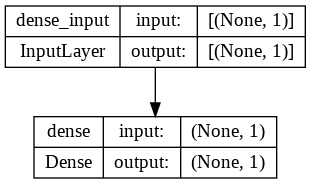

In [12]:
from keras.utils.vis_utils import plot_model

plot_model(model, show_shapes=True)

In [13]:
# Make predictions
y_preds = model.predict(X_test)
# View the predictions
y_preds

1/1 [==============================] - 0s 110ms/step


array([[ 13.722492],
       [174.12025 ],
       [140.86707 ],
       [117.39422 ],
       [ 50.887825],
       [ 33.283195],
       [113.48208 ],
       [ 70.44853 ],
       [160.42776 ],
       [193.68095 ]], dtype=float32)

In [14]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plot training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="r", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="y", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="g", label="Predictions")
  # Show the legend
  plt.legend();

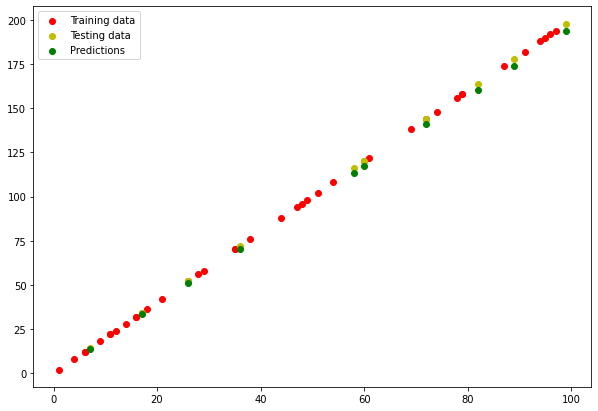

In [15]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

In [16]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 107ms/step - loss: 2.3686 - mae: 2.3686


[2.3685619831085205, 2.3685619831085205]

In [17]:
# Calculate MAE with TensorFlow's inbuilt function
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([95.477516, 70.47215 , 55.773415, 51.6     , 69.06731 , 79.77344 ,
       52.103584, 61.020588, 62.971107, 85.344765], dtype=float32)>

We are getting 10 different values for MAE but ideally it should be 1 only. Let's figure out the issue

In [18]:
y_test.shape

TensorShape([10])

In [19]:
y_preds.shape

(10, 1)

As we can see the shape of y_test and y_pred are different. Here comes in picture the use of squeeze method which will remove the dimensions of size 1 from the tensor `tf.squeeze()`

In [20]:
y_preds = tf.squeeze(y_preds)
y_preds.shape

TensorShape([10])

In [21]:
# Calulate MAE using TF
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_preds)
mae.numpy()

2.368562

### Saving a Model in TensorFlow
We can save TensorFlow/Keras model using `model.save()`. We can save model in two ways:
* SavedModel Format : Models saved in this format can be restored using `tf.keras.models.load_model` and are compatible with TensorFlow Serving. The `SavedModel` format is a directory containing a protobuf binary and a TensorFlow checkpoint.
* HDF5 Format


In [22]:
# Save a model using the SavedModel format
model.save('model_SavedModel_format')

In [23]:
# Check the  outputs a protobuf binary file (.pb) as well as other files
!ls model_SavedModel_format

assets	keras_metadata.pb  saved_model.pb  variables


In [24]:
# Save the model using HDF5 format
model.save('model_hdf5_format.h5')

### Load the Model in TensorFlow
We can use `load_model()` for this

In [25]:
# SavedModel Format
load_saved_model = tf.keras.models.load_model('model_SavedModel_format')
load_saved_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [26]:
# HDF5 Model
load_hdf5_model = tf.keras.models.load_model('model_hdf5_format.h5')
load_hdf5_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
